In [1]:
import xarray as xr
from hilde.trajectory import reader
from hilde.green_kubo.heat_flux import get_cumulative_kappa, get_heat_flux_aurocorrelation

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_context('paper', font_scale=1.8)

## Create `heat_flux.nc`
Run
```bash
➤ hilde output md CsPbBr_300K.son -hf -d 200
```

In [3]:
# read the heat flux dataset
DS = xr.load_dataset('heat_flux.nc')

In [4]:
# Compute heat flux autoccorrelation function
jcorr = get_heat_flux_aurocorrelation(DS)

j = jcorr.sum(axis=(1, 2)).to_series()

[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.62  K
[GreenKubo]    -> Prefactor:    1266145.06  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 0.498s


In [5]:
# compute cumulative kappa
kappa = get_cumulative_kappa(DS)

k = kappa.sum(axis=(1, 2)).to_series() / 3

[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.62  K
[GreenKubo]    -> Prefactor:    1266145.06  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 0.559s
[GreenKubo]    Integrate heat flux autocorrelation function cumulatively
[GreenKubo]    .. Integrator:   `scipy.integrate.cumtrapz`
[GreenKubo]    .. analytic:      False


In [6]:
k.iloc[-1]
j.iloc[0]

27.89026177401778

(0, 1000)

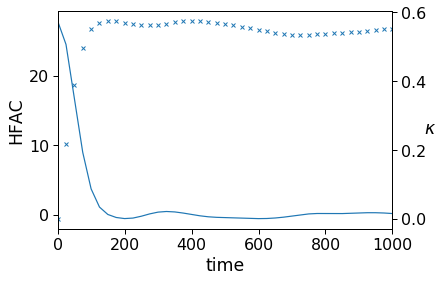

In [7]:
#plot

ax1 = j.plot()
ax1.set_ylabel('HFAC')

ax2 = ax1.twinx()
k.plot(ax=ax2, style='x')
ax2.set_ylabel(r'$\kappa$', rotation=0)


ax1.set_xlim([0, 1000])